In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("boxoffice.csv")
dataset

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158
...,...,...,...,...,...,...,...,...,...,...
2689,X-Men,38153242,47601900,Disney,140965221,3532,106955513,G,Comedy,92
2690,The Matrix,63305093,252473529,Disney,190634982,3171,111238142,PG-13,Comedy,156
2691,Forrest Gump,271758510,524896297,Disney,112771730,2450,112364620,NC-17,Drama,146
2692,Jaws,268259149,791515453,Disney,194172443,661,172229703,G,Thriller,170


In [3]:
dataset.shape

(2694, 10)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
title               2694 non-null object
domestic_revenue    2694 non-null int64
world_revenue       2694 non-null int64
distributor         2694 non-null object
opening_revenue     2694 non-null int64
opening_theaters    2694 non-null int64
budget              2694 non-null int64
MPAA                2694 non-null object
genres              2694 non-null object
release_days        2694 non-null int64
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [5]:
dataset.isnull().sum()

title               0
domestic_revenue    0
world_revenue       0
distributor         0
opening_revenue     0
opening_theaters    0
budget              0
MPAA                0
genres              0
release_days        0
dtype: int64

In [6]:
dataset.describe()

,domestic_revenue,world_revenue,opening_revenue,opening_theaters,budget,release_days
count,2.694000e+03,2.694000e+03,2.694000e+03,2694.000000,2.694000e+03,2694.000000
mean,1.508539e+08,7.719177e+08,9.971321e+07,2263.039347,1.537996e+08,90.897550
std,8.579997e+07,4.284414e+08,5.721762e+07,1298.559140,8.557624e+07,50.894041
min,8.277650e+05,3.261301e+06,1.385690e+05,10.000000,5.197977e+06,1.000000
25%,7.673272e+07,3.991135e+08,5.033848e+07,1161.000000,7.861876e+07,47.000000
50%,1.525725e+08,7.665551e+08,9.981418e+07,2271.500000,1.562567e+08,91.000000
75%,2.247314e+08,1.143920e+09,1.489805e+08,3392.250000,2.274832e+08,135.000000
max,2.998107e+08,1.499310e+09,1.999336e+08,4499.000000,2.998597e+08,179.000000


In [7]:
missing_rows = dataset[dataset.isnull().any(axis=1)]

In [8]:
missing_rows

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days


In [9]:
duplicates = dataset[dataset.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [title, domestic_revenue, world_revenue, distributor, opening_revenue, opening_theaters, budget, MPAA, genres, release_days]
Index: []


In [10]:
def universal_encode(dataset):
    """
    Encodes all object (categorical) columns using frequency encoding.
    Works safely with all models and avoids creating many columns.
    """
    for col in dataset.select_dtypes(include='object').columns:
        freq_map = dataset[col].value_counts().to_dict()
        dataset[col] = dataset[col].map(freq_map)
    return dataset
dataset=universal_encode(dataset)
dataset

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,87,6026491,1274885664,545,163620146,253,174687337,556,468,16
1,87,169411543,1132871091,492,85549990,122,103948486,534,455,103
2,87,107836098,583329845,532,55681429,3826,122104991,546,428,89
3,87,51433697,1225323391,492,109775324,3868,46431596,534,428,85
4,87,142791649,604140729,545,59476800,2934,203513696,556,473,158
...,...,...,...,...,...,...,...,...,...,...
2689,87,38153242,47601900,492,140965221,3532,106955513,534,473,92
2690,87,63305093,252473529,492,190634982,3171,111238142,551,473,156
2691,87,271758510,524896297,492,112771730,2450,112364620,546,432,146
2692,87,268259149,791515453,492,194172443,661,172229703,534,438,170


In [11]:
# to know unwanted columns in dataset
def auto_clean(dataset, target=None):
    drop_cols = []

    for col in dataset.columns:
        if col == target:
            continue
        if dataset[col].isnull().mean() > 0.5:
            drop_cols.append(col)
        elif dataset[col].nunique() <= 1:
            drop_cols.append(col)
        elif 'id' in col.lower() or dataset[col].nunique() == dataset.shape[0]:
            drop_cols.append(col)
        elif dataset[col].dtype == 'object' and dataset[col].nunique() > 100:
            drop_cols.append(col)

    print("Dropped columns:", drop_cols)
    return dataset.drop(columns=drop_cols)


In [13]:
#dataset= pd.get_dummies(dataset,dtype=int,drop_first=True)
#dataset

In [14]:
quan=[]
qual=[]
for columnName in dataset.columns:
   # print("columnName")
    if(dataset[columnName].dtype=='O'):
        #print("qual")
        qual.append(columnName)
    else:
       # print("quan")
        quan.append(columnName)


In [25]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","Q4:100%","IQR","1.5 rule", "Lesser",
                                "Greater","Min","Max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5 rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5 rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5 rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()

In [26]:
def FindingOutliers(descriptive,quan):
    Lesser=[]
    Greater=[]
    for columnName in quan:
        if(descriptive[columnName]['Min']< descriptive[columnName]['Lesser']):
            Lesser.append(columnName)
            
        if(descriptive[columnName]['Max']> descriptive[columnName]['Greater']):
            Greater.append(columnName)
        return Lesser,Greater

In [27]:
Lesser,Greater= FindingOutliers(descriptive,quan)

In [28]:
Lesser

[]

In [29]:
Greater

[]

In [24]:
for columnName in Lesser:
    dataset[columnName][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
for columnName in Greater:
    dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]
    
    

In [20]:
import seaborn as sns

C:\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a de

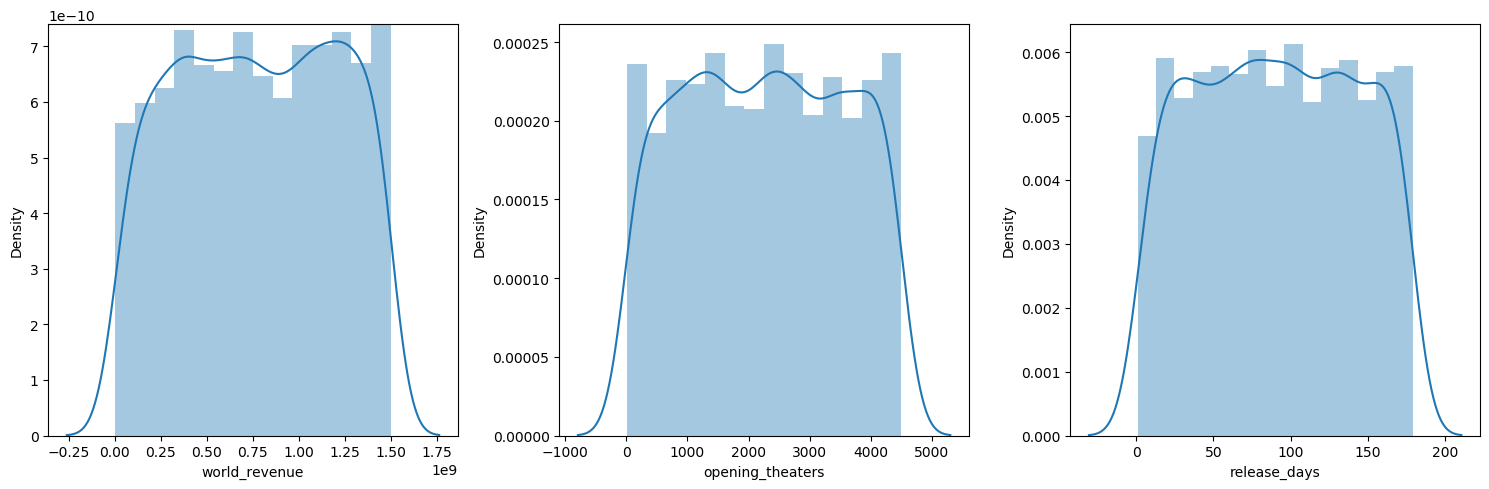

In [21]:
plt.subplots(figsize=(15, 5))

features = ['world_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.distplot(dataset[col])
plt.tight_layout()
plt.show()

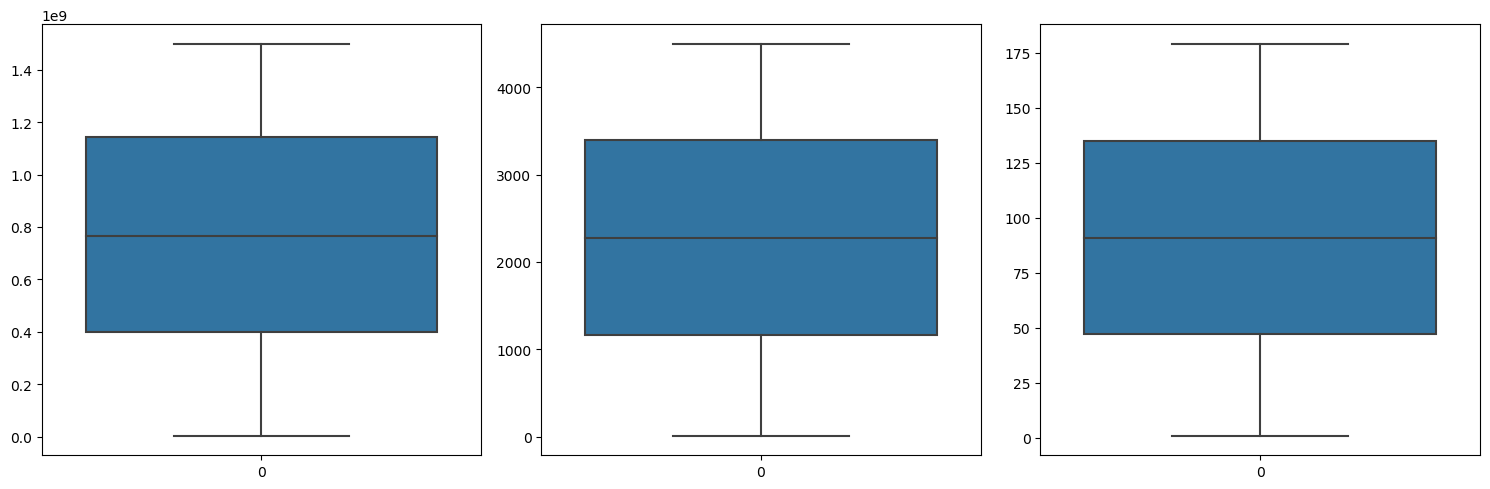

In [22]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(dataset[col])
plt.tight_layout()
plt.show()

In [30]:
dataset.cov()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
title,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
domestic_revenue,0.0,7.361634e+15,1.879228e+14,1.270473e+07,1.064927e+14,7.426474e+08,-1.558223e+14,3.321132e+06,1.027230e+07,-2.569346e+07
world_revenue,0.0,1.879228e+14,1.835621e+17,-4.840482e+08,-4.519434e+14,-2.188378e+10,-2.148751e+14,-9.772524e+07,-2.583906e+08,-4.574571e+07
distributor,0.0,1.270473e+07,-4.840482e+08,6.908212e+02,-3.577706e+06,2.862493e+02,2.143756e+07,-8.619906e+00,1.084840e+01,-2.544840e+01
opening_revenue,0.0,1.064927e+14,-4.519434e+14,-3.577706e+06,3.273856e+15,-1.318746e+09,9.582195e+13,1.484805e+07,-2.009268e+07,5.635256e+07
opening_theaters,0.0,7.426474e+08,-2.188378e+10,2.862493e+02,-1.318746e+09,1.686256e+06,-1.456941e+09,7.689490e+01,-1.617144e+02,2.431611e+02
budget,0.0,-1.558223e+14,-2.148751e+14,2.143756e+07,9.582195e+13,-1.456941e+09,7.323293e+15,1.839590e+07,-5.048767e+07,-1.665385e+07
MPAA,0.0,3.321132e+06,-9.772524e+07,-8.619906e+00,1.484805e+07,7.689490e+01,1.839590e+07,2.966709e+02,6.736114e+00,-2.984418e+01
genres,0.0,1.027230e+07,-2.583906e+08,1.084840e+01,-2.009268e+07,-1.617144e+02,-5.048767e+07,6.736114e+00,3.056573e+02,-3.606807e+00
release_days,0.0,-2.569346e+07,-4.574571e+07,-2.544840e+01,5.635256e+07,2.431611e+02,-1.665385e+07,-2.984418e+01,-3.606807e+00,2.590203e+03


In [31]:
dataset.corr()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domestic_revenue,NaN,1.000000,0.005112,0.005634,0.021692,0.006666,-0.021222,0.002247,0.006848,-0.005884
world_revenue,NaN,0.005112,1.000000,-0.042985,-0.018436,-0.039334,-0.005861,-0.013243,-0.034496,-0.002098
distributor,NaN,0.005634,-0.042985,1.000000,-0.002379,0.008387,0.009531,-0.019041,0.023608,-0.019024
opening_revenue,NaN,0.021692,-0.018436,-0.002379,1.000000,-0.017749,0.019570,0.015066,-0.020086,0.019352
opening_theaters,NaN,0.006666,-0.039334,0.008387,-0.017749,1.000000,-0.013111,0.003438,-0.007123,0.003679
budget,NaN,-0.021222,-0.005861,0.009531,0.019570,-0.013111,1.000000,0.012480,-0.033745,-0.003824
MPAA,NaN,0.002247,-0.013243,-0.019041,0.015066,0.003438,0.012480,1.000000,0.022369,-0.034045
genres,NaN,0.006848,-0.034496,0.023608,-0.020086,-0.007123,-0.033745,0.022369,1.000000,-0.004054
release_days,NaN,-0.005884,-0.002098,-0.019024,0.019352,0.003679,-0.003824,-0.034045,-0.004054,1.000000


# FEATURE SELECTION

In [33]:
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
import pickle
import matplotlib.pyplot as plt



def selectkbest(indep_X,dep_Y,n):
        test = SelectKBest(score_func=chi2, k=n)
        fit1= test.fit(indep_X,dep_Y)
        # summarize scores       
        selectk_features = fit1.transform(indep_X)
        return selectk_features
    
def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
    
def r2_prediction(regressor,X_test,y_test):
     y_pred = regressor.predict(X_test)
     from sklearn.metrics import r2_score
     r2=r2_score(y_test,y_pred)
     return r2
 
def Linear(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2   
    
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'linear')
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
    
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'rbf')
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
     

def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training setC
        from sklearn.tree import DecisionTreeRegressor
        regressor = DecisionTreeRegressor(random_state = 0)
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
     

def random(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestRegressor
        regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2 
    
    
def selectk_regression(acclin,accsvml,accsvmnl,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Linear','SVMl','SVMnl','Decision','Random'
                                                                                     ])

    for number,idex in enumerate(dataframe.index):
        
        dataframe['Linear'][idex]=acclin[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe
    
dataset1=pd.read_csv("boxoffice.csv",index_col=None)

df2=dataset1

df2 = pd.get_dummies(df2, drop_first=True)

indep_X=df2.drop('world_revenue', 1)
dep_Y=df2['world_revenue']


kbest=selectkbest(indep_X,dep_Y,5)      

acclin=[]
accsvml=[]
accsvmnl=[]
accdes=[]
accrf=[]

X_train, X_test, y_train, y_test=split_scalar(kbest,dep_Y)  
for i in kbest:   
    r2_lin=Linear(X_train,y_train,X_test)
    acclin.append(r2_lin)
    
    r2_sl=svm_linear(X_train,y_train,X_test)    
    accsvml.append(r2_sl)
    
    r2_NL=svm_NL(X_train,y_train,X_test)
    accsvmnl.append(r2_NL)
    
    r2_d=Decision(X_train,y_train,X_test)
    accdes.append(r2_d)
    
    r2_r=random(X_train,y_train,X_test)
    accrf.append(r2_r)
    
    
result=selectk_regression(acclin,accsvml,accsvmnl,accdes,accrf)



result

,Linear,SVMl,SVMnl,Decision,Random
ChiSquare,-0.0005514,-0.00113845,-0.00113847,-0.911784,-0.132432


In [37]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, chi2

# 1. Load Data
df = pd.read_csv("boxoffice.csv")
# 5. Convert to dummy variables
df = pd.get_dummies(df, drop_first=True)

# 6. Feature and target split
X = df.drop('world_revenue', axis=1)
y = df['world_revenue']

# 7. Select top 5 features using Chi-Square
selector = SelectKBest(score_func=chi2, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Top 5 selected features:\n", selected_features.tolist())

# 8. Subset dataframe to selected features
X_filtered = X[selected_features]

# 9. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# 10. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# 11. Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# 12. Evaluate R2 Score
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# 13. Save Model, Scaler, and Features
pickle.dump(model, open("DecisionTree_model.sav", "wb"))
pickle.dump(scaler, open("scaler.sav", "wb"))
pickle.dump(selected_features.tolist(), open("selected_features.sav", "wb"))

Top 5 selected features:
 ['domestic_revenue', 'opening_revenue', 'opening_theaters', 'budget', 'release_days']
R² Score: -0.9118


In [39]:
import pandas as pd
import pickle

# Load saved components
model = pickle.load(open("DecisionTree_model.sav", "rb"))
scaler = pickle.load(open("scaler.sav", "rb"))
selected_features = pickle.load(open("selected_features.sav", "rb"))

# Sample input dictionary (make sure to use exact selected feature names)
user_input = {
    'budget': 50000000,
    'domestic_revenue': 40000000,
    'opening_revenue': 15000000,
    'opening_theaters': 2000,
    'release_days': 7
}

# Convert to DataFrame
user_df = pd.DataFrame([user_input])

# Scale the features
scaled_input = scaler.transform(user_df)

# Predict revenue
prediction = model.predict(scaled_input)[0]
print(f"Predicted World Revenue: ${prediction:,.2f}")


Predicted World Revenue: $1,434,597,309.00


C:\Anaconda\envs\aiml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
